In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.metrics import r2_score

from utils import scatter_plot, scatter_plot2, get_flat_features, get_gcn_features, get_targets
from dataset import NASBench101Dataset

In [2]:
from linear_reg import LRPredictor
from random_forest import RFPredictor
from xgb import XGBPredictor
from mlp import MLPPredictor
from gcn import GCNPredictor

In [3]:
dataset = NASBench101Dataset('data/nasbench.hdf5', "172") # 860
dataset_test  = NASBench101Dataset('data/nasbench.hdf5', "all")
dataset_size = len(dataset)

In [4]:
train_data = np.array(list(get_flat_features(dataset)))
test_data = np.array(list(get_flat_features(dataset_test)))

train_targets = np.array(list(get_targets(dataset)))
test_targets = np.array(list(get_targets(dataset_test)))

### MLP test

In [5]:
from mlp_new import MLPPredictor

mlp = MLPPredictor()
print(mlp)
mlp.set_random_hyperparams()
print(mlp)

MLPPredictor
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: None
  Hyperparameters: None

MLPPredictor
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: None
  Hyperparameters: {'num_layers': 24, 'layer_width': [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], 'batch_size': 32, 'lr': 0.000980427977437501, 'regularization': 0.2, 'epochs': 500}



[05/08 17:33:24] INFO (root) Epoch 1, Loss: 1.3528
[05/08 17:33:24] INFO (root) Epoch 2, Loss: 1.3216
[05/08 17:33:24] INFO (root) Epoch 3, Loss: 1.2880
[05/08 17:33:24] INFO (root) Epoch 4, Loss: 1.2538
[05/08 17:33:24] INFO (root) Epoch 5, Loss: 1.2206
[05/08 17:33:24] INFO (root) Epoch 6, Loss: 1.1861
[05/08 17:33:24] INFO (root) Epoch 7, Loss: 1.1507
[05/08 17:33:24] INFO (root) Epoch 8, Loss: 1.1141
[05/08 17:33:24] INFO (root) Epoch 9, Loss: 1.0770
[05/08 17:33:24] INFO (root) Epoch 10, Loss: 1.0380
[05/08 17:33:24] INFO (root) Epoch 11, Loss: 0.9961
[05/08 17:33:24] INFO (root) Epoch 12, Loss: 0.9516
[05/08 17:33:24] INFO (root) Epoch 13, Loss: 0.9023
[05/08 17:33:25] INFO (root) Epoch 14, Loss: 0.8466
[05/08 17:33:25] INFO (root) Epoch 15, Loss: 0.7829
[05/08 17:33:25] INFO (root) Epoch 16, Loss: 0.7070
[05/08 17:33:25] INFO (root) Epoch 17, Loss: 0.6177
[05/08 17:33:25] INFO (root) Epoch 18, Loss: 0.5201
[05/08 17:33:25] INFO (root) Epoch 19, Loss: 0.4546
[05/08 17:33:25] INFO

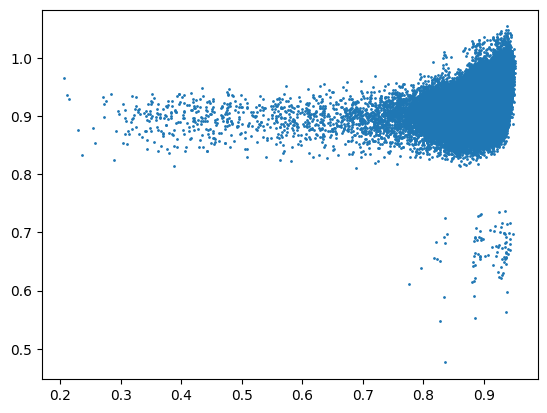

In [8]:
mlp.fit(train_data, train_targets)

preds = mlp.predict(test_data)

plt.scatter(test_targets, preds, s=1)
plt.show()

In [9]:
mlp.save("data/mlp_new172.pkl")

In [14]:
mlp2 = MLPPredictor()
mlp2.load("data/mlp_new172.pkl", input_dims=train_data.shape[1])

In [15]:
mlp2.refit(train_data, train_targets)

[05/08 17:35:32] INFO (root) Epoch 1, Loss: 1.4170
[05/08 17:35:32] INFO (root) Epoch 2, Loss: 1.3614
[05/08 17:35:32] INFO (root) Epoch 3, Loss: 1.3047
[05/08 17:35:32] INFO (root) Epoch 4, Loss: 1.2474
[05/08 17:35:32] INFO (root) Epoch 5, Loss: 1.1895
[05/08 17:35:32] INFO (root) Epoch 6, Loss: 1.1302
[05/08 17:35:32] INFO (root) Epoch 7, Loss: 1.0693
[05/08 17:35:32] INFO (root) Epoch 8, Loss: 1.0060
[05/08 17:35:32] INFO (root) Epoch 9, Loss: 0.9401
[05/08 17:35:32] INFO (root) Epoch 10, Loss: 0.8716
[05/08 17:35:32] INFO (root) Epoch 11, Loss: 0.8014
[05/08 17:35:32] INFO (root) Epoch 12, Loss: 0.7315
[05/08 17:35:32] INFO (root) Epoch 13, Loss: 0.6639
[05/08 17:35:32] INFO (root) Epoch 14, Loss: 0.6033
[05/08 17:35:33] INFO (root) Epoch 15, Loss: 0.5563
[05/08 17:35:33] INFO (root) Epoch 16, Loss: 0.5354
[05/08 17:35:33] INFO (root) Epoch 17, Loss: 0.5327
[05/08 17:35:33] INFO (root) Epoch 18, Loss: 0.5209
[05/08 17:35:33] INFO (root) Epoch 19, Loss: 0.5126
[05/08 17:35:33] INFO

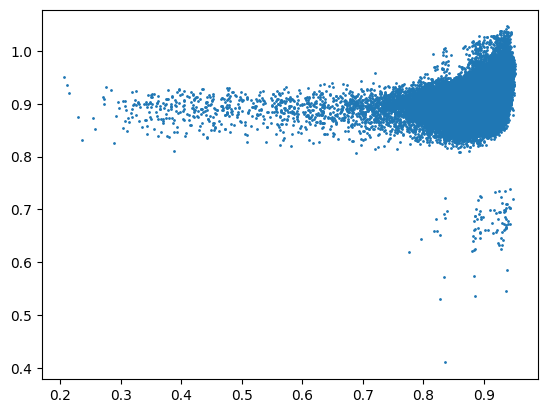

In [16]:
preds = mlp2.predict(test_data)
plt.scatter(test_targets, preds, s=1)

In [6]:
# Run hyperparameter optimization
import time

# Perform hyperparameter optimization using cross-validation
start_time = time.time()

best_hyperparams, best_cv_score = mlp.run_hpo(
    xtrain=train_data,
    ytrain=train_targets,
    start_time=start_time,
    metric="kendalltau",
    max_iters=5000,
)

Starting cross validation
[05/08 16:56:12] INFO (root) Epoch 1, Loss: 1.2800
[05/08 16:56:12] INFO (root) Epoch 2, Loss: 1.2086
[05/08 16:56:12] INFO (root) Epoch 3, Loss: 1.1405
[05/08 16:56:12] INFO (root) Epoch 4, Loss: 1.0796
[05/08 16:56:12] INFO (root) Epoch 5, Loss: 1.0192
[05/08 16:56:12] INFO (root) Epoch 6, Loss: 0.9569
[05/08 16:56:12] INFO (root) Epoch 7, Loss: 0.8957
[05/08 16:56:12] INFO (root) Epoch 8, Loss: 0.8325
[05/08 16:56:12] INFO (root) Epoch 9, Loss: 0.7680
[05/08 16:56:12] INFO (root) Epoch 10, Loss: 0.6998
[05/08 16:56:12] INFO (root) Epoch 11, Loss: 0.6211
[05/08 16:56:12] INFO (root) Epoch 12, Loss: 0.5400
[05/08 16:56:13] INFO (root) Epoch 13, Loss: 0.4623
[05/08 16:56:13] INFO (root) Epoch 14, Loss: 0.3912
[05/08 16:56:13] INFO (root) Epoch 15, Loss: 0.3303
[05/08 16:56:13] INFO (root) Epoch 16, Loss: 0.2826
[05/08 16:56:13] INFO (root) Epoch 17, Loss: 0.2495
[05/08 16:56:13] INFO (root) Epoch 18, Loss: 0.2280
[05/08 16:56:13] INFO (root) Epoch 19, Loss: 0.

In [8]:
print(mlp)

MLPPredictor
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: FeedforwardNet(
  (layers): ModuleList(
    (0): Linear(in_features=84, out_features=6, bias=True)
    (1): Linear(in_features=6, out_features=6, bias=True)
    (2): Linear(in_features=6, out_features=6, bias=True)
    (3): Linear(in_features=6, out_features=6, bias=True)
    (4): Linear(in_features=6, out_features=6, bias=True)
    (5): Linear(in_features=6, out_features=6, bias=True)
    (6): Linear(in_features=6, out_features=6, bias=True)
    (7): Linear(in_features=6, out_features=6, bias=True)
    (8): Linear(in_features=6, out_features=6, bias=True)
    (9): Linear(in_features=6, out_features=6, bias=True)
    (10): Linear(in_features=6, out_features=6, bias=True)
    (11): Linear(in_features=6, out_features=6, bias=True)
    (12): Linear(in_features=6, out_features=6, bias=True)
    (13): Linear(in_features=6, out_features=6, bias=True)
    (14): Linear(in_features=6, out_features=6,

In [8]:
mlp.set_random_hyperparams()
print(mlp)

MLPPredictor
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: FeedforwardNet(
  (layers): ModuleList(
    (0): Linear(in_features=84, out_features=6, bias=True)
    (1): Linear(in_features=6, out_features=6, bias=True)
    (2): Linear(in_features=6, out_features=6, bias=True)
    (3): Linear(in_features=6, out_features=6, bias=True)
    (4): Linear(in_features=6, out_features=6, bias=True)
    (5): Linear(in_features=6, out_features=6, bias=True)
    (6): Linear(in_features=6, out_features=6, bias=True)
    (7): Linear(in_features=6, out_features=6, bias=True)
    (8): Linear(in_features=6, out_features=6, bias=True)
    (9): Linear(in_features=6, out_features=6, bias=True)
    (10): Linear(in_features=6, out_features=6, bias=True)
    (11): Linear(in_features=6, out_features=6, bias=True)
    (12): Linear(in_features=6, out_features=6, bias=True)
    (13): Linear(in_features=6, out_features=6, bias=True)
    (14): Linear(in_features=6, out_features=6,

In [10]:
mlp.set_random_hyperparams()
print(mlp)

MLPPredictor
  Encoding Type: adj_onehot
  Search Space Type: nasbench101
  Model Architecture: FeedforwardNet(
  (layers): ModuleList(
    (0): Linear(in_features=84, out_features=6, bias=True)
    (1): Linear(in_features=6, out_features=6, bias=True)
    (2): Linear(in_features=6, out_features=6, bias=True)
    (3): Linear(in_features=6, out_features=6, bias=True)
    (4): Linear(in_features=6, out_features=6, bias=True)
    (5): Linear(in_features=6, out_features=6, bias=True)
    (6): Linear(in_features=6, out_features=6, bias=True)
    (7): Linear(in_features=6, out_features=6, bias=True)
    (8): Linear(in_features=6, out_features=6, bias=True)
    (9): Linear(in_features=6, out_features=6, bias=True)
    (10): Linear(in_features=6, out_features=6, bias=True)
    (11): Linear(in_features=6, out_features=6, bias=True)
    (12): Linear(in_features=6, out_features=6, bias=True)
    (13): Linear(in_features=6, out_features=6, bias=True)
    (14): Linear(in_features=6, out_features=6,

In [11]:
mlp.save("data/mlp_new_172.pkl")

In [12]:
mlp2 = MLPPredictor()
mlp2.load("data/mlp_new_172.pkl", input_dims=train_data.shape[1])

RuntimeError: Error(s) in loading state_dict for FeedforwardNet:
	Unexpected key(s) in state_dict: "layers.0.weight", "layers.0.bias", "layers.1.weight", "layers.1.bias", "layers.2.weight", "layers.2.bias", "layers.3.weight", "layers.3.bias", "layers.4.weight", "layers.4.bias", "layers.5.weight", "layers.5.bias", "layers.6.weight", "layers.6.bias", "layers.7.weight", "layers.7.bias", "layers.8.weight", "layers.8.bias", "layers.9.weight", "layers.9.bias", "layers.10.weight", "layers.10.bias", "layers.11.weight", "layers.11.bias", "layers.12.weight", "layers.12.bias", "layers.13.weight", "layers.13.bias", "layers.14.weight", "layers.14.bias", "layers.15.weight", "layers.15.bias", "layers.16.weight", "layers.16.bias", "layers.17.weight", "layers.17.bias", "layers.18.weight", "layers.18.bias", "layers.19.weight", "layers.19.bias", "layers.20.weight", "layers.20.bias", "layers.21.weight", "layers.21.bias", "layers.22.weight", "layers.22.bias", "layers.23.weight", "layers.23.bias", "out.weight", "out.bias". 

In [6]:
mlp.save("data/mlp_new172.pkl")


In [7]:
mlp2 = MLPPredictor()
mlp2.load("data/mlp_new172.pkl", input_dims=train_data.shape[1])

In [8]:
mlp2.refit(train_data, train_targets)

[05/08 16:37:26] INFO (root) Epoch 1, Loss: 2.0107
[05/08 16:37:26] INFO (root) Epoch 2, Loss: 1.8675
[05/08 16:37:26] INFO (root) Epoch 3, Loss: 1.6827
[05/08 16:37:26] INFO (root) Epoch 4, Loss: 1.4259
[05/08 16:37:26] INFO (root) Epoch 5, Loss: 1.1677
[05/08 16:37:26] INFO (root) Epoch 6, Loss: 1.1629
[05/08 16:37:26] INFO (root) Epoch 7, Loss: 1.0967
[05/08 16:37:26] INFO (root) Epoch 8, Loss: 1.0836
[05/08 16:37:26] INFO (root) Epoch 9, Loss: 1.0474
[05/08 16:37:26] INFO (root) Epoch 10, Loss: 1.0269
[05/08 16:37:26] INFO (root) Epoch 11, Loss: 1.0034
[05/08 16:37:26] INFO (root) Epoch 12, Loss: 0.9828
[05/08 16:37:26] INFO (root) Epoch 13, Loss: 0.9622
[05/08 16:37:27] INFO (root) Epoch 14, Loss: 0.9418
[05/08 16:37:27] INFO (root) Epoch 15, Loss: 0.9215
[05/08 16:37:27] INFO (root) Epoch 16, Loss: 0.9012
[05/08 16:37:27] INFO (root) Epoch 17, Loss: 0.8811
[05/08 16:37:27] INFO (root) Epoch 18, Loss: 0.8608
[05/08 16:37:27] INFO (root) Epoch 19, Loss: 0.8406
[05/08 16:37:27] INFO

### Linear Regression

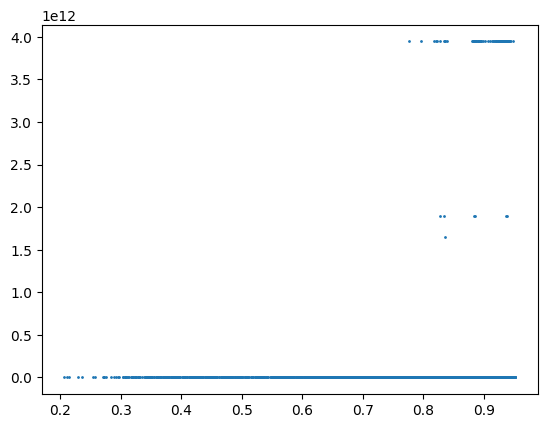

In [43]:
lr_predictor = LRPredictor()

lr_predictor.fit(train_data, train_targets)
lr_predictions = lr_predictor.predict(test_data)

plt.scatter(test_targets, lr_predictions,s=1)
plt.show()

In [13]:
lr_predictor.save("models/lr_172.pkl")

In [15]:
lr_predictor2 = LRPredictor()
lr_predictor2.load("models/lr_172.pkl")

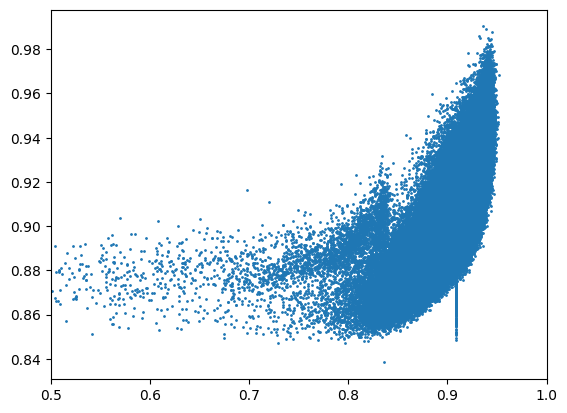

In [34]:
lr_predictions2 = lr_predictor2.predict(test_data)

plt.scatter(test_targets, lr_predictions2,s=1)
plt.xlim(0.5, 1)
plt.xlim(0.5, 1)
plt.show()

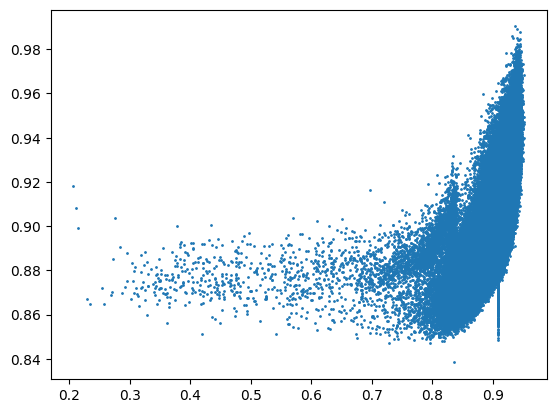

In [17]:
lr_predictor2.refit(test_data, test_targets)

lr_predictions3 = lr_predictor2.predict(test_data)

plt.scatter(test_targets, lr_predictions3,s=1)
plt.show()

### Random Forest 

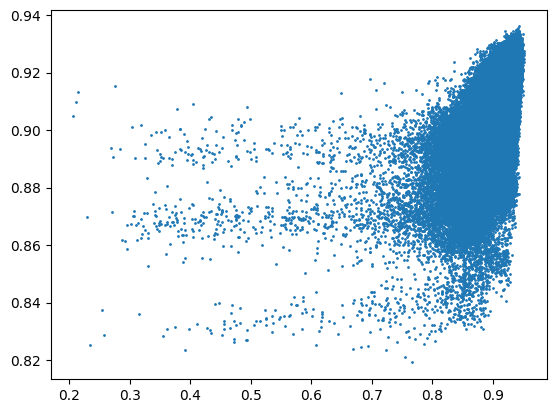

In [18]:
rf_predictor = RFPredictor()

rf_predictor.fit(train_data, train_targets)

rf_predictions = rf_predictor.predict(test_data)

plt.scatter(test_targets, rf_predictions,s=1)
plt.show()

In [21]:
rf_predictor.set_random_hyperparams()
rf_predictor.save("models/rf_172.pkl")

In [24]:
rf_predictor2 = RFPredictor()
rf_predictor2.load("models/rf_172.pkl")

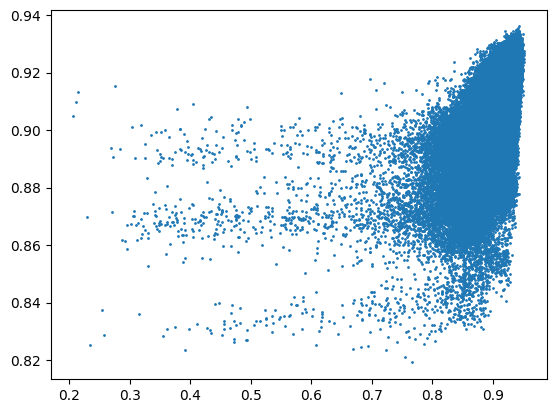

In [25]:
rf_predictions2 = rf_predictor2.predict(test_data)

plt.scatter(test_targets, rf_predictions2,s=1)
plt.show()

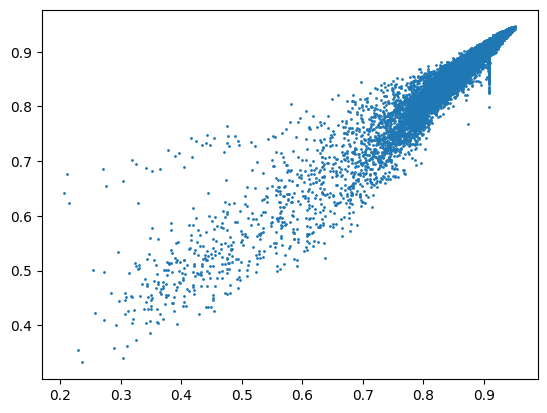

In [26]:
rf_predictor2.refit(test_data, test_targets)

rf_predictions3 = rf_predictor2.predict(test_data)

plt.scatter(test_targets, rf_predictions3,s=1)
plt.show()

In [44]:
# Run hyperparameter optimization
import time

# Perform hyperparameter optimization using cross-validation
start_time = time.time()

best_hyperparams, best_cv_score = rf_predictor.run_hpo(
    xtrain=train_data,
    ytrain=train_targets,
    start_time=start_time,
    metric="kendalltau",
    max_iters=5000,
)

Starting cross validation
[0/5000] cv_score=0.3759, params={'n_estimators': 20, 'max_features': 0.5346344804768679, 'min_samples_leaf': 11, 'min_samples_split': 10, 'bootstrap': False}
--> new best score = 0.3758866711367869, hparams = {'n_estimators': 20, 'max_features': 0.5346344804768679, 'min_samples_leaf': 11, 'min_samples_split': 10, 'bootstrap': False}
patience = 0/50
[1/5000] cv_score=0.4102, params={'n_estimators': 32, 'max_features': 0.13582513293093085, 'min_samples_leaf': 8, 'min_samples_split': 3, 'bootstrap': False}
--> new best score = 0.4102115073877888, hparams = {'n_estimators': 32, 'max_features': 0.13582513293093085, 'min_samples_leaf': 8, 'min_samples_split': 3, 'bootstrap': False}
patience = 0/50
[2/5000] cv_score=0.4060, params={'n_estimators': 114, 'max_features': 0.31665220665736943, 'min_samples_leaf': 14, 'min_samples_split': 17, 'bootstrap': False}
patience = 1/50
[3/5000] cv_score=0.3897, params={'n_estimators': 21, 'max_features': 0.7194104250983654, 'min_

### XGBoost

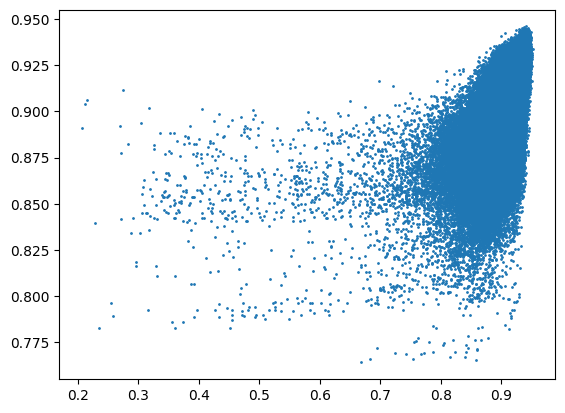

In [28]:
xgb_predictor = XGBPredictor()

xgb_predictor.fit(train_data, train_targets)

xgb_predictions = xgb_predictor.predict(test_data)

plt.scatter(test_targets, xgb_predictions,s=1)
plt.show()

In [29]:
xgb_predictor.set_random_hyperparams()
xgb_predictor.save("models/xgb_172.pkl")

In [30]:
xgb_predictor2 = XGBPredictor()
xgb_predictor2.load("models/xgb_172.pkl")

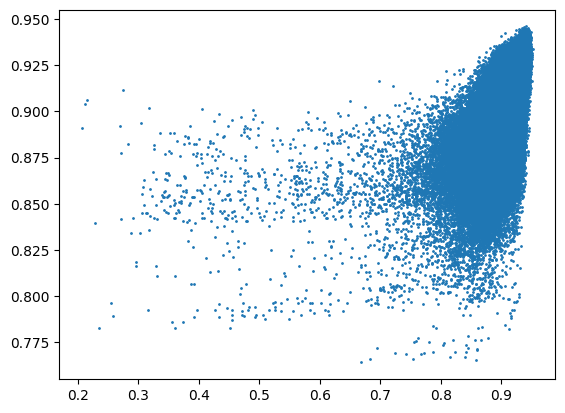

In [31]:
xgb_predictions2 = xgb_predictor2.predict(test_data)
 
plt.scatter(test_targets, xgb_predictions2,s=1)
plt.show()

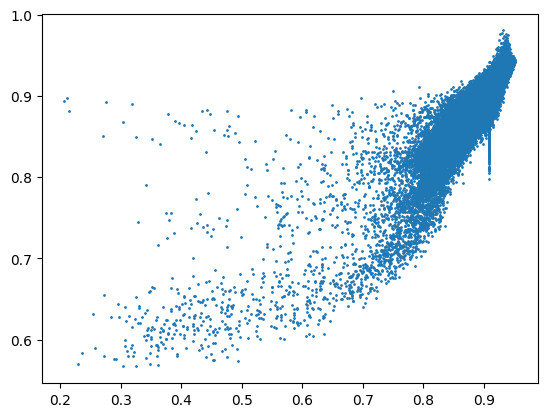

In [32]:
xgb_predictor2.refit(test_data, test_targets)

xgb_predictions3 = xgb_predictor2.predict(test_data)

plt.scatter(test_targets, xgb_predictions3,s=1)
plt.show()

In [45]:
# Run hyperparameter optimization
import time

# Perform hyperparameter optimization using cross-validation
start_time = time.time()

best_hyperparams, best_cv_score = xgb_predictor.run_hpo(
    xtrain=train_data,
    ytrain=train_targets,
    start_time=start_time,
    metric="kendalltau",
    max_iters=5000,
)

Starting cross validation
[0/5000] cv_score=0.3955, params={'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'booster': 'gbtree', 'max_depth': 8, 'min_child_weight': 3, 'colsample_bytree': 0.28828254298846456, 'learning_rate': 0.31710129781391844, 'colsample_bylevel': 0.9676206036139325}
--> new best score = 0.39553627819536663, hparams = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'booster': 'gbtree', 'max_depth': 8, 'min_child_weight': 3, 'colsample_bytree': 0.28828254298846456, 'learning_rate': 0.31710129781391844, 'colsample_bylevel': 0.9676206036139325}
patience = 0/50
[1/5000] cv_score=0.3955, params={'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'booster': 'gbtree', 'max_depth': 6, 'min_child_weight': 2, 'colsample_bytree': 0.4437626325990721, 'learning_rate': 0.2018106892261321, 'colsample_bylevel': 0.054976505031936185}
patience = 1/50
[2/5000] cv_score=0.3955, params={'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'booster': 'gbtree', 'm

### MLP

In [84]:
dataset = NASBench101Dataset('data/nasbench.hdf5', "172") # 860
dataset_test  = NASBench101Dataset('data/nasbench.hdf5', "all")
dataset_size = len(dataset)

train_data = np.array(list(get_flat_features(dataset)))
test_data = np.array(list(get_flat_features(dataset_test)))

train_targets = np.array(list(get_targets(dataset)))
test_targets = np.array(list(get_targets(dataset_test)))

In [5]:
mlp_predictor = MLPPredictor()
 
mlp_predictor.fit(train_data, train_targets)

TypeError: empty() received an invalid combination of arguments - got (tuple, dtype=NoneType, device=NoneType), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of SymInts size, *, torch.memory_format memory_format, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


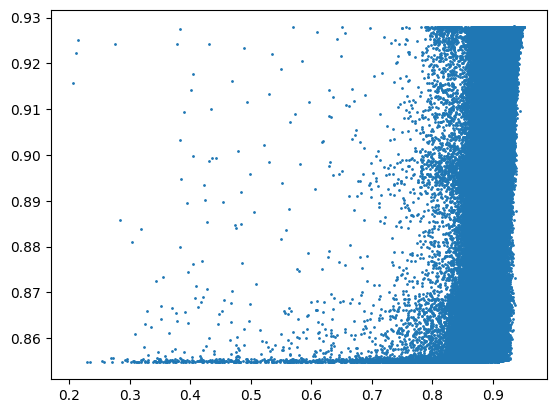

In [ ]:
mlp_predictions = mlp_predictor.predict(test_data)

plt.scatter(test_targets, mlp_predictions,s=1)
plt.show()

In [74]:
mlp_predictor.set_random_hyperparams()
mlp_predictor.save("models/mlp_172.pkl")

In [77]:
mlp_predictor2 = MLPPredictor(input_dims=test_data.shape[1])
mlp_predictor2.load("models/mlp_172.pkl")

In [79]:
mlp_predictor2.refit(test_data, test_targets)
plt.scatter(test_targets, mlp_predictions,s=1)
plt.show()

KeyboardInterrupt: 

In [80]:
# Run hyperparameter optimization
import time

# Perform hyperparameter optimization using cross-validation
start_time = time.time()

best_hyperparams, best_cv_score = mlp_predictor.run_hpo(
    xtrain=train_data,
    ytrain=train_targets,
    start_time=start_time,
    metric="kendalltau",
    max_iters=5000,
)

# Set the best hyperparameters
mlp_predictor.set_hyperparams(best_hyperparams)

Starting cross validation
[0/5000] cv_score=0.6991, params={'model_params': {'num_layers': 23, 'layer_width': 14, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cuda', index=0)}
--> new best score = 0.6990903047349791, hparams = {'model_params': {'num_layers': 23, 'layer_width': 14, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cuda', index=0)}
patience = 0/50
[1/5000] cv_score=0.7442, params={'model_params': {'num_layers': 9, 'layer_width': 5, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cuda', index=0)}
--> new best score = 0.7441811609840454, hparams = {'model_params': {'num_layers': 9, 'layer_width': 5, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cuda', index=0)}
patience = 0/50
[2

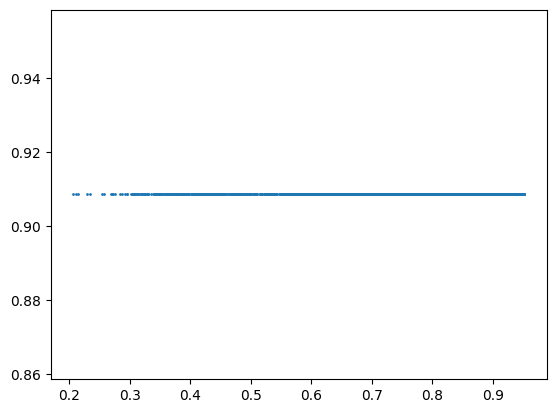

In [85]:
mlp_predictor.fit(train_data, train_targets)
mlp_predictions = mlp_predictor.predict(test_data)

plt.scatter(test_targets, mlp_predictions,s=1)
plt.show()

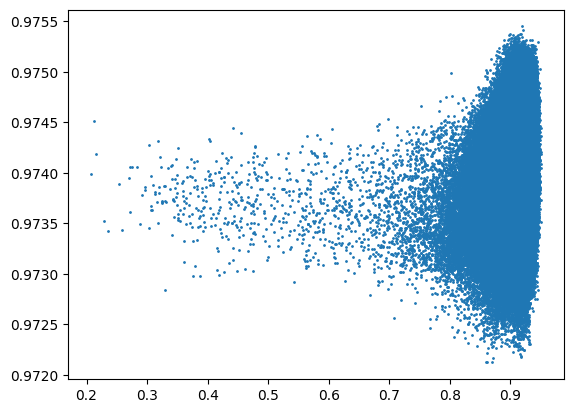

In [97]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(20, 20,20, 20,20, 20,20, 20,20, 20, 20, 20,20, 20,20, 20,20, 20,20, 20,20, 20), max_iter=5000, random_state=0)
mlp.fit(train_data, train_targets)
mlp_predictions = mlp.predict(test_data)

plt.scatter(test_targets, mlp_predictions,s=1)
plt.show()

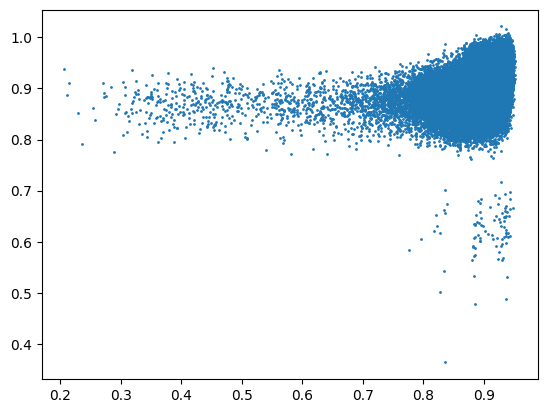

In [19]:
from mlp_test import MLPPredictor

mlp = MLPPredictor()
mlp.fit(train_data, train_targets)

mlp_predictions = mlp.predict(test_data)

plt.scatter(test_targets, mlp_predictions,s=1)
plt.show()

In [6]:
# Run hyperparameter optimization
import time

# Perform hyperparameter optimization using cross-validation
start_time = time.time()

best_hyperparams, best_cv_score = mlp.run_hpo(
    xtrain=train_data,
    ytrain=train_targets,
    start_time=start_time,
    metric="kendalltau",
    max_iters=5000,
)

Starting cross validation
[0/5000] cv_score=0.4900, params={'model_params': {'num_layers': 24, 'layer_width': 6, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cuda', index=0)}
--> new best score = 0.4899864790201148, hparams = {'model_params': {'num_layers': 24, 'layer_width': 6, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cuda', index=0)}
patience = 0/50
[1/5000] cv_score=nan, params={'model_params': {'num_layers': 23, 'layer_width': 22, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.1, 'epochs': 100, 'device': device(type='cuda', index=0)}
patience = 1/50
[2/5000] cv_score=nan, params={'model_params': {'num_layers': 23, 'layer_width': 14, 'output_dims': 1, 'activation': 'relu'}, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 100, 'device': device(type='cuda', index=0)}
patience = 2/50
[3/5000] cv

KeyboardInterrupt: 